In [178]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [179]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [180]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [181]:
from glob import glob

In [182]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [183]:
type(csv_files)
d = {}

In [184]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [185]:
d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [186]:
d['./zippedData/imdb.title.crew.csv.gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [187]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [188]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [189]:
csv_files_dict['imdb_title_crew_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


In [190]:
for key in csv_files_dict:
     print(key, csv_files_dict[key].info())

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB
imdb_title_crew_gz None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
tmdb_movies_gz None
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
ordering             331703 non-null int64
title       

In [191]:
df_repository = {} #by creating a dictionary, we can manipulate the data without messing up the originals in csv_files_dict
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames    
    exec('df_'+ filename_cleaned + """ = csv_files_dict['""" + filename_cleaned + """']""") #executing code using strings
    exec("""df_repository[""" + """'""" + filename_cleaned + """']""" + """= df_""" + filename_cleaned )


In [192]:
for db in df_repository.keys():
    print(db, 'contains ', df_repository[db].duplicated().sum(), ' duplicates')

imdb_title_crew_gz contains  22915  duplicates
tmdb_movies_gz contains  1020  duplicates
imdb_title_akas_gz contains  2220  duplicates
imdb_title_ratings_gz contains  45074  duplicates
imdb_name_basics_gz contains  239  duplicates
imdb_title_basics_gz contains  122  duplicates
tn_movie_budgets_gz contains  0  duplicates
bom_movie_gross_gz contains  11  duplicates
imdb_title_principals_gz contains  114187  duplicates


In [193]:
def clean_duplicates(dataframe): #returns a dataframe without duplicates
    cleaned_filter = dataframe.duplicated()
    index_to_drop = dataframe.loc[cleaned_filter].index
    return dataframe.drop(index=index_to_drop)

In [194]:
for db in df_repository.keys(): #loop to parse dataframes through the clean_duplicates() function we wrote above
    df_repository[db] = clean_duplicates(df_repository[db])

In [195]:
def NaN_to_zero(DataFrame, DataSeries, change_into=0):
    filt = DataSeries.isna()
    DataFrame.loc[filt] = change_into
    return DataFrame

In [196]:
df_bom_movie_gross_gz.foreign_gross.value_counts('0')

1200000      0.011291
1100000      0.006873
1900000      0.005891
4200000      0.005891
1300000      0.005400
               ...   
712400000    0.000491
339100000    0.000491
93100000     0.000491
171200000    0.000491
38000000     0.000491
Name: foreign_gross, Length: 1204, dtype: float64

In [197]:
df_bom_movie_gross_gz.isna()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,False,False,False,False
Alice in Wonderland (2010),False,False,False,False
Harry Potter and the Deathly Hallows Part 1,False,False,False,False
Inception,False,False,False,False
Shrek Forever After,False,False,False,False
...,...,...,...,...
The Quake,False,False,True,False
Edward II (2018 re-release),False,False,True,False
El Pacto,False,False,True,False


In [198]:
df_bom_movie_gross_gz.dropna()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
I Still See You,LGF,1400.0,1500000,2018
The Catcher Was a Spy,IFC,725000.0,229000,2018
Time Freak,Grindstone,10000.0,256000,2018


In [199]:
items_counts = df_bom_movie_gross_gz['domestic_gross'].value_counts(normalize = True)
print(items_counts)

1100000.0      0.009527
1000000.0      0.008931
1300000.0      0.008931
1200000.0      0.007443
1400000.0      0.006847
                 ...   
68800.0        0.000298
87000000.0     0.000298
739000.0       0.000298
336000000.0    0.000298
727000.0       0.000298
Name: domestic_gross, Length: 1797, dtype: float64


In [200]:
items_counts = df_bom_movie_gross_gz['foreign_gross'].value_counts(normalize = True)
print(items_counts)

1200000      0.011291
1100000      0.006873
1900000      0.005891
4200000      0.005891
1300000      0.005400
               ...   
712400000    0.000491
339100000    0.000491
93100000     0.000491
171200000    0.000491
38000000     0.000491
Name: foreign_gross, Length: 1204, dtype: float64


In [201]:
def string_to_float(string):
    if string == None:
        new_string = 0
    else:
        if (type(string) != int) and (type(string) != float):
            new_string = string.replace('$', '')
            new_string = new_string.replace(',', '')

        else:
            new_string = string
    return float(new_string)


def series_string_to_float(dataseries):
    new_dataseries = dataseries.apply(string_to_float)
    return new_dataseries

In [202]:
type(df_bom_movie_gross_gz.foreign_gross[0]) #the data here is stored as strings instead of numerical values


str

In [203]:
new_series = series_string_to_float(df_bom_movie_gross_gz.foreign_gross)
type(new_series[0]) #checking if it works

numpy.float64

In [204]:
df_bom_movie_gross_gz.foreign_gross = series_string_to_float(df_bom_movie_gross_gz.foreign_gross)

In [205]:
df_bom_movie_gross_gz['total_gross'] = df_bom_movie_gross_gz['foreign_gross'].add(df_bom_movie_gross_gz['domestic_gross'], fill_value=0.0)
df_bom_movie_gross_gz.head()

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [206]:
df_bom_movie_gross_gz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 5 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
total_gross       3387 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 318.8+ KB


Question 2: What production companies make films with the highest grossing? What is composition of genre?

We will use the bom_movie_gross_gz dataset for production studio & total grossing

We will use the df_imbd_title_basics_gz for genre, as know this is the best for genre from previous questions

In [207]:
df_imdb_title_basics_gz.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [208]:
df_imdb_title_basics_gz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 11.7+ MB


In [209]:
#Explortation into the genre values

In [210]:
df_imdb_title_basics_gz['genres'].isna().sum()

5408

In [211]:
#Remove all rows with NaN values in genres

In [212]:
df_genre_nonan = df_imdb_title_basics_gz[df_imdb_title_basics_gz['genres'].notna()]

In [213]:
df_genre_nonan['genres'].isna().sum()

0

In [214]:
#using merge and using a left join. As col names are different, using left_on and right_on options

studio_movie_details_df = pd.merge(df_bom_movie_gross_gz, df_genre_nonan, left_on=  ['title'],
                   right_on= ['primary_title'], 
                   how = 'left')

In [215]:
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN
2,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"


In [216]:
studio_movie_details_df.shape

(4107, 10)

In [217]:
studio_movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4107 entries, 0 to 4106
Data columns (total 10 columns):
studio             4102 non-null object
domestic_gross     4072 non-null float64
foreign_gross      2489 non-null float64
year               4107 non-null int64
total_gross        4107 non-null float64
primary_title      3326 non-null object
original_title     3326 non-null object
start_year         3326 non-null float64
runtime_minutes    3185 non-null float64
genres             3326 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 352.9+ KB


In [218]:
#removing Nan values from genres column
studio_movie_details_df = studio_movie_details_df[studio_movie_details_df['genres'].notna()]

In [219]:
studio_movie_details_df.shape

(3326, 10)

In [220]:
#genre is a list of upto 3 genres, splitting it to get the individual genres

studio_movie_details_df['genres'] = studio_movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,"[Adventure, Animation, Comedy]"
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,"[Action, Adventure, Sci-Fi]"
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,"[Adventure, Animation, Comedy]"
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,"[Adventure, Drama, Fantasy]"
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Iron Man 2,2010.0,124.0,"[Action, Adventure, Sci-Fi]"


In [45]:
#Writing code to select first genre value in each row

In [46]:
single_genres = pd.DataFrame(studio_movie_details_df['genres'].values.tolist()).iloc[:, [0]]


In [47]:
studio_movie_details_df['genres'] = single_genres 

In [48]:
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,Adventure
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,Adventure
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,Action
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,Adventure
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Iron Man 2,2010.0,124.0,Animation


In [66]:
studio_movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 0 to 4106
Data columns (total 10 columns):
studio             3323 non-null object
domestic_gross     3302 non-null float64
foreign_gross      2016 non-null float64
year               3326 non-null int64
total_gross        3326 non-null float64
primary_title      3326 non-null object
original_title     3326 non-null object
start_year         3326 non-null float64
runtime_minutes    3185 non-null float64
genres             2681 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 285.8+ KB


In [67]:
new_studio_movie_details_df = (studio_movie_details_df.drop(columns=['start_year', 'original_title', 'runtime_minutes']))

In [68]:
new_studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Adventure
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Adventure
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Action
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,Adventure
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Animation


In [78]:
year_graph_studio = new_studio_movie_details_df.groupby(['year', 'studio']).sum()
year_graph_studio.head(100)

domestic_gross  foreign_gross   total_gross
year studio                                             
2010 3D        6.100000e+06   9.900000e+06  1.600000e+07
     ATO       1.000000e+06   4.070000e+04  1.040700e+06
     Abr.      2.280000e+04   0.000000e+00  2.280000e+04
     Anch.     9.310000e+04   4.800000e+05  5.731000e+05
     App.      7.200000e+06   2.200000e+06  9.400000e+06
...                     ...            ...           ...
2011 PDA       2.360000e+07   6.600000e+06  3.020000e+07
     Pala.     8.190000e+04   0.000000e+00  8.190000e+04
     Par.      1.448400e+09   2.094400e+09  3.542800e+09
     ParV      1.020000e+07   1.008000e+06  1.120800e+07
     RAtt.     3.779800e+07   5.860000e+07  9.639800e+07

[100 rows x 3 columns]

In [ ]:
#What you want to do is actually again a groupby (on the result of the first groupby): sort and take the first 7 elements per group.

In [ ]:
#We group by the first level of the index:

In [76]:
g = year_graph_studio['total_gross'].groupby(level=0, group_keys=False)

In [ ]:
#Then we want to sort ('order') each group and take the first 10 elements:

In [120]:
topten_prod_comp_year = g.nlargest(7) 
topten_prod_comp_year.head()

year  studio
2010  Uni.      2.961497e+09
      Fox       2.955400e+09
      WB        2.485756e+09
      BV        2.434937e+09
      Sum.      2.093400e+09
Name: total_gross, dtype: float64

In [121]:
type(topten_prod_comp_year)

pandas.core.series.Series

In [122]:
s = topten_prod_comp_year.to_frame() #convert to Dataframe

In [123]:
s.head()

total_gross
year studio              
2010 Uni.    2.961497e+09
     Fox     2.955400e+09
     WB      2.485756e+09
     BV      2.434937e+09
     Sum.    2.093400e+09

In [124]:
df_year_2 = s.reset_index()
df_year_2.head()

,year,studio,total_gross
0,2010,Uni.,2.961497e+09
1,2010,Fox,2.955400e+09
2,2010,WB,2.485756e+09
3,2010,BV,2.434937e+09
4,2010,Sum.,2.093400e+09


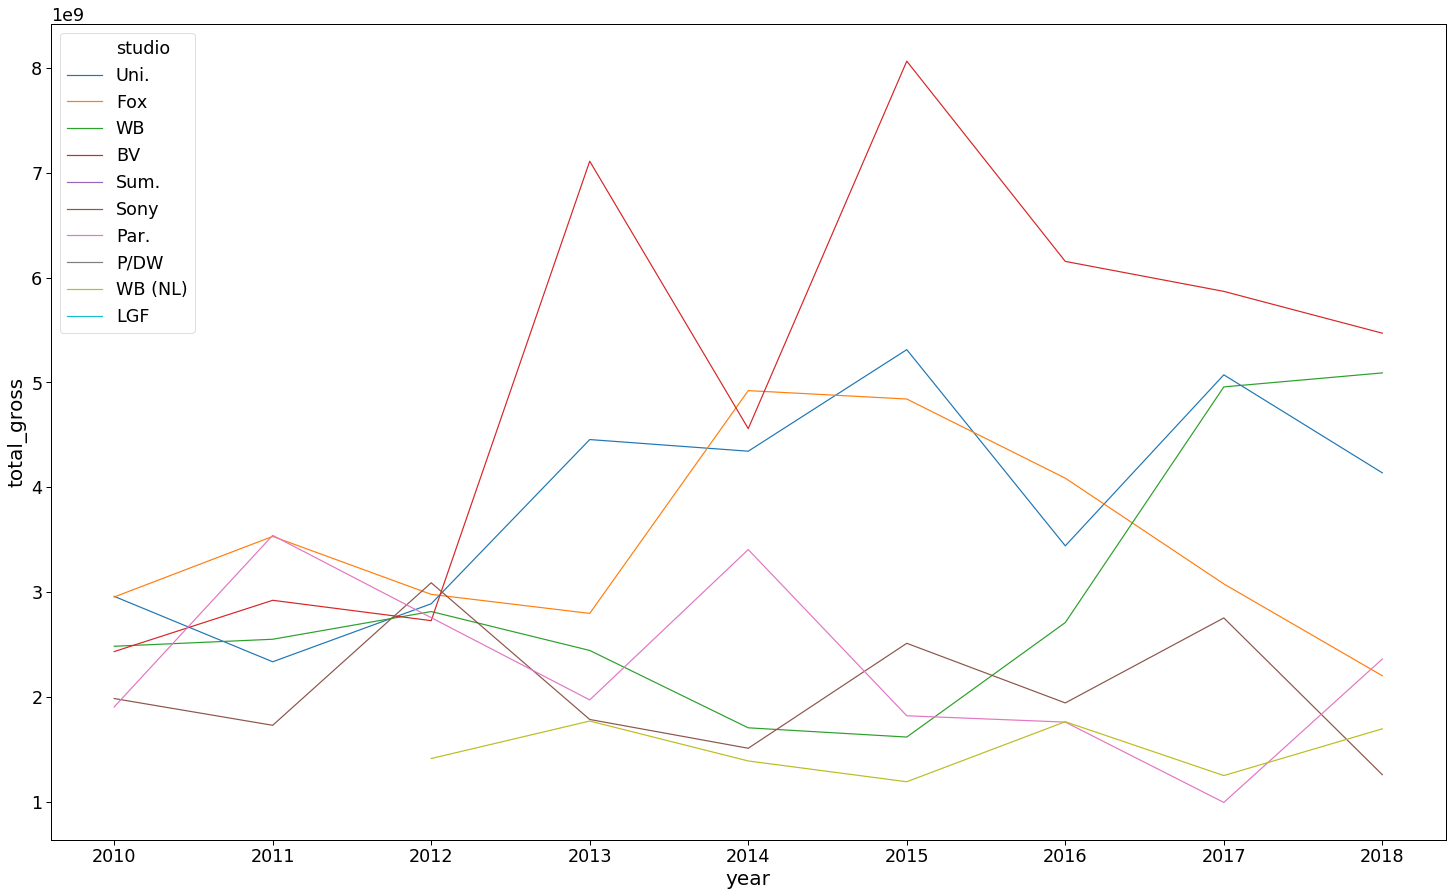

In [125]:
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px3 = sns.lineplot(x="year", y="total_gross", hue="studio",
                  data=df_year_2)

In [ ]:
df_year = year_graph_studio.reset_index()
df_year.head()

In [86]:
df_year = year_graph_studio.reset_index()
df_year.head()

,year,studio,domestic_gross,foreign_gross,total_gross
0,2010,3D,6100000.0,9900000.0,16000000.0
1,2010,ATO,1000000.0,40700.0,1040700.0
2,2010,Abr.,22800.0,0.0,22800.0
3,2010,Anch.,93100.0,480000.0,573100.0
4,2010,App.,7200000.0,2200000.0,9400000.0


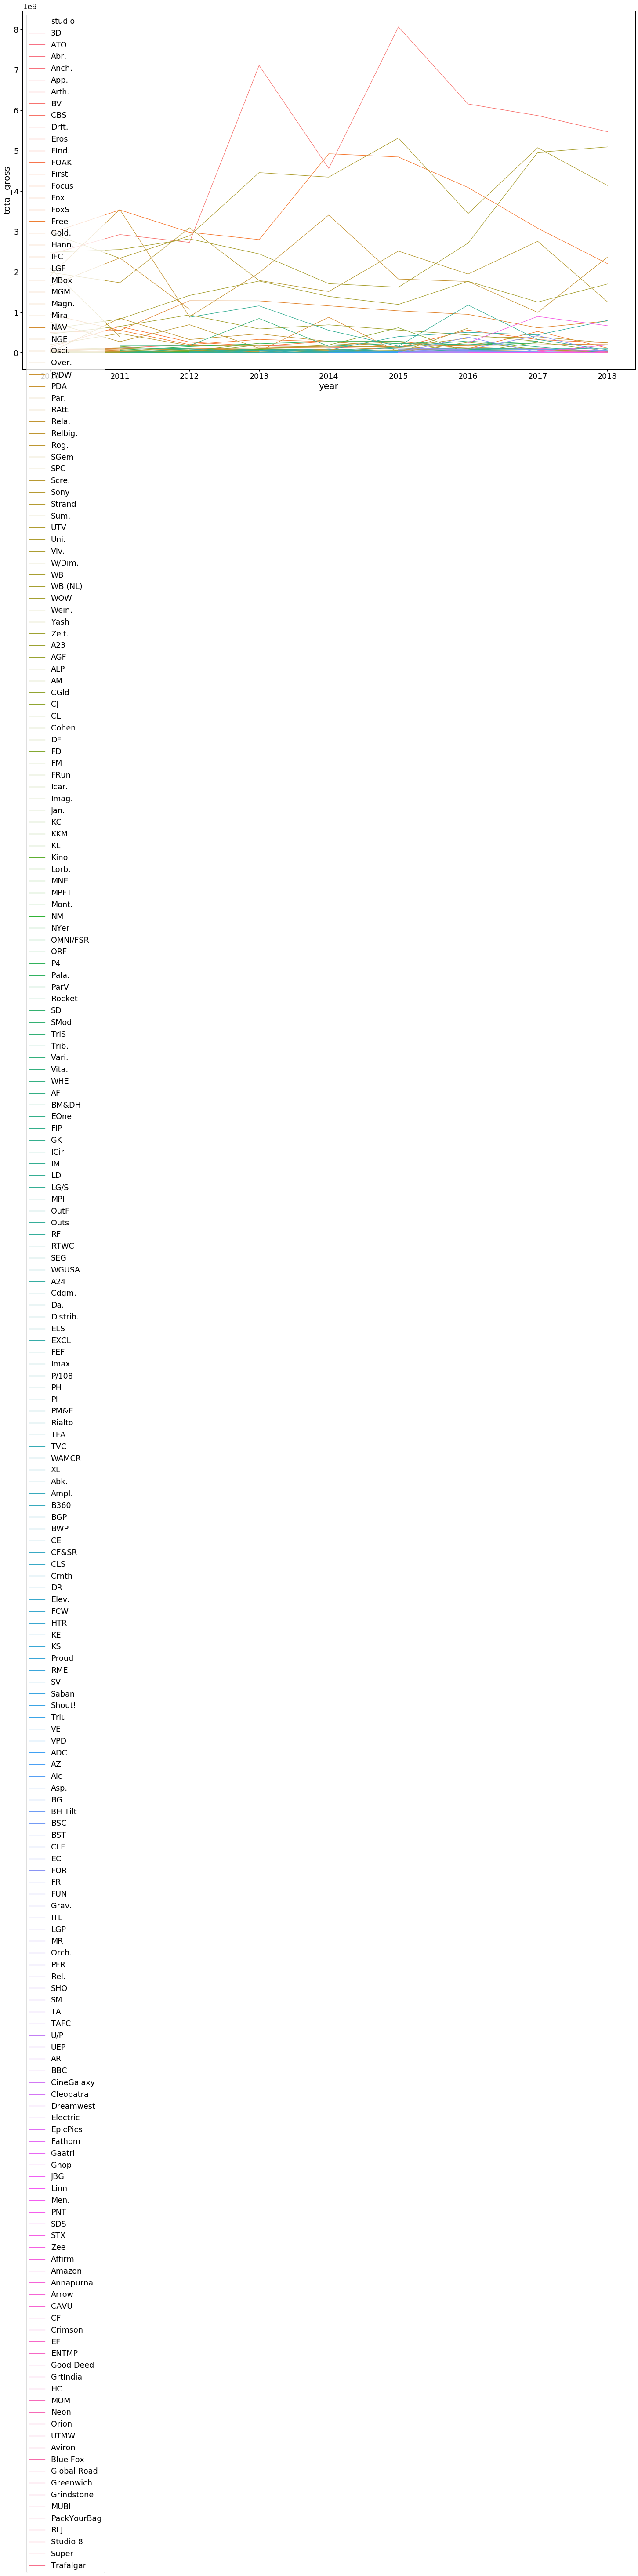

In [62]:
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px4 = sns.lineplot(x="year", y="total_gross", hue="studio",
                  data=df_year)

In [59]:
df_year = year_graph_studio.reset_index()

In [54]:
noyear_new_studio_movie_details_df = (studio_movie_deta
                                      
                                 
      ils_df.drop(columns=['start_year', 'original_title', 'runtime_minutes', 'year']))

In [55]:
sum_graph_studio = noyear_new_studio_movie_details_df.groupby(['studio']).sum()

In [137]:
sum_graph_studio.head()

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,6100000.0,9900000.0,16000000.0
A23,164200.0,0.0,164200.0
A24,313263800.0,212900000.0,526163800.0
ADC,248200.0,0.0,248200.0
AF,4189900.0,9300000.0,13489900.0


In [138]:
count_graph = new_studio_movie_details_df.groupby(['studio','genres']).count()

In [139]:
count_graph.head()

domestic_gross  foreign_gross  year  total_gross  \
studio genres                                                        
3D     Comedy                  1              1     1            1   
A23    Action                  2              0     2            2   
A24    Action                  7              2     7            7   
       Adventure               1              1     1            1   
       Animation               1              0     1            1   

                  primary_title  
studio genres                    
3D     Comedy                 1  
A23    Action                 2  
A24    Action                 7  
       Adventure              1  
       Animation              1

In [140]:
#Create bar chart of most common genres from our top competitors

In [144]:
top_comp = count_graph.loc[['Uni.','Fox','WB','BV','Sum.','Sony','Par.']]

In [164]:
top_comp.head()

,index,studio,genres,domestic_gross,foreign_gross,year,total_gross,primary_title
0,0,BV,Action,21,21,21,21,21
1,1,BV,Adventure,9,8,9,9,9
2,2,BV,Animation,1,1,1,1,1
3,3,BV,Biography,2,2,2,2,2
4,4,BV,Comedy,19,18,19,19,19


In [165]:
top_comp.reset_index(inplace=True)

In [166]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 12.5

In [167]:
plt.figure(figsize=(20,8))
ax5 = sns.barplot(x='studio', y='primary_title', hue='genres' data=top_comp);
ax5.set(xlabel="Studio", ylabel = "Total")

SyntaxError: invalid syntax (<ipython-input-167-a914564c70ab>, line 2)

In [168]:
#amount of films per year by top competitors

In [169]:
count_graph_year = new_studio_movie_details_df.groupby(['studio','year']).count()

In [170]:
count_graph_year.head()

domestic_gross  foreign_gross  total_gross  primary_title  genres
studio year                                                                   
3D     2010               1              1            1              1       1
A23    2011               1              0            1              1       1
       2013               1              0            1              1       1
A24    2013               5              2            5              5       5
       2014              10              4           10             10      10

In [171]:
top_comp_year = count_graph_year.loc[['Uni.','Fox','WB','BV','Sum.','Sony','Par.']]

In [172]:
top_comp_year.head()

domestic_gross  foreign_gross  total_gross  primary_title  genres
studio year                                                                   
BV     2010               8              8            8              8       8
       2011              12             11           12             12      12
       2012              12             10           12             12      12
       2013              11             11           11             11      11
       2014              16             16           16             16      16

In [173]:
top_comp_year.reset_index(inplace=True)

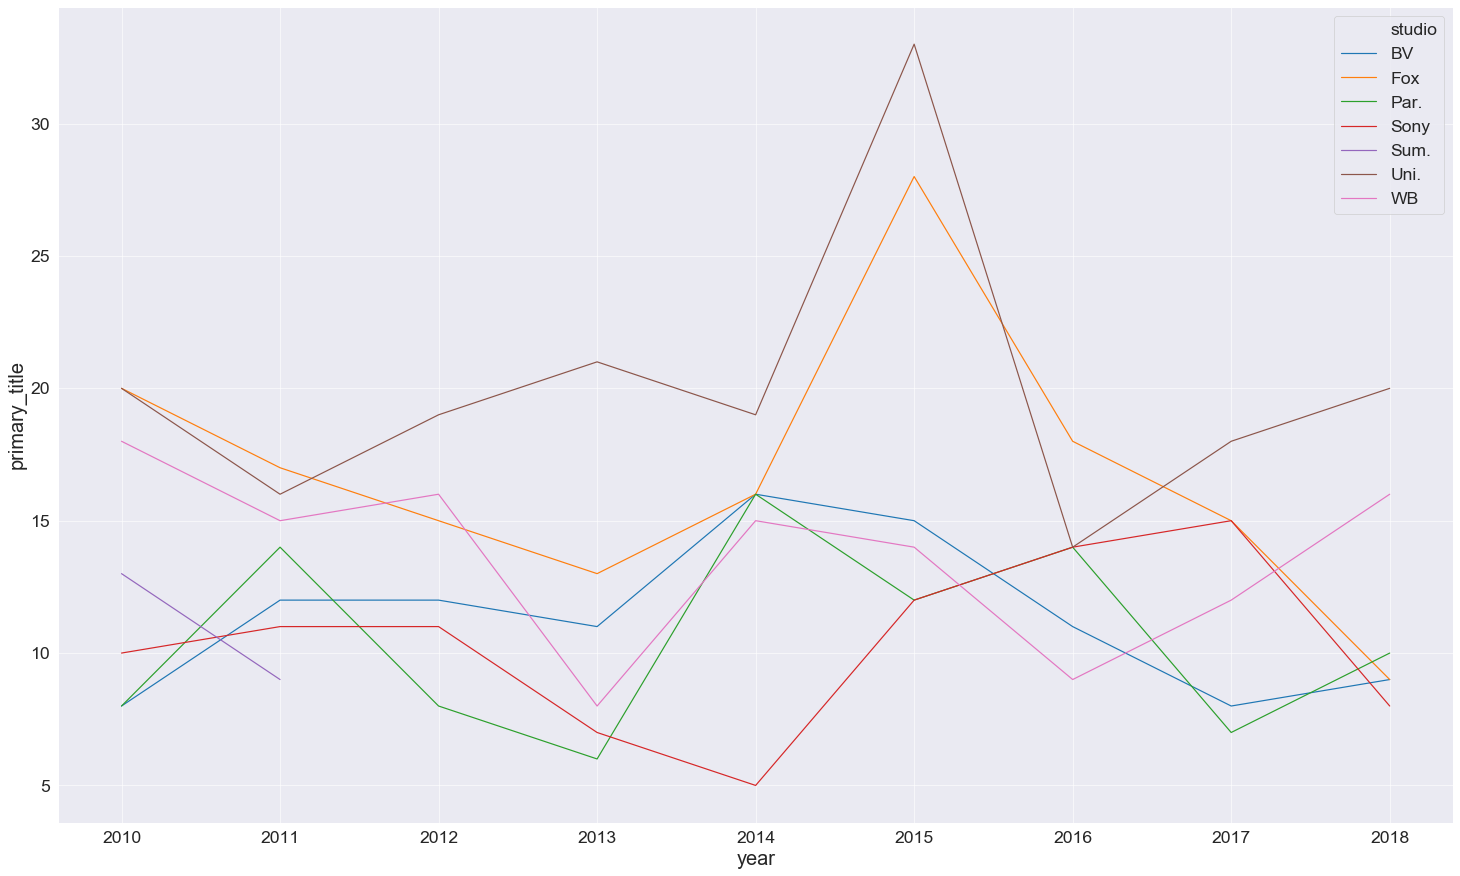

In [175]:
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px2 = sns.lineplot(x="year", y='primary_title', hue="studio",
                  data=top_comp_year)

In [ ]:
plt.figure(figsize=(20,8))
ax5 = sns.barplot(x='production', y='primary_title', hue='genre' data=top_comp);
ax5.set(xlabel="Studio", ylabel = "Total")